### Build a random forest classifier to predict the risk of heart disease based on a dataset of patientinformation. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the numerical features if necessary.

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 No null Value

No categorical Values

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()

In [7]:
#Independent and dependent Variable
from sklearn.model_selection import train_test_split
X=df.drop('target',axis=1)
y=df['target']

### Q2. Split the dataset into a training set (70%) and a test set (30%).

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [9]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [10]:
X_test

array([[ 0.28901314,  0.71713717, -0.9801628 , ..., -0.67796691,
         0.37792709, -2.23530377],
       [ 0.50705864,  0.71713717,  1.91929553, ..., -0.67796691,
        -0.67629057,  1.13753893],
       [ 0.28901314,  0.71713717,  0.95280942, ...,  0.955317  ,
         0.37792709,  1.13753893],
       ...,
       [ 1.37924064, -1.39443338, -0.9801628 , ...,  0.955317  ,
         1.43214475, -0.54888242],
       [ 0.39803589,  0.71713717,  0.95280942, ..., -0.67796691,
        -0.67629057,  1.13753893],
       [ 2.36044538, -1.39443338,  0.95280942, ..., -0.67796691,
        -0.67629057, -0.54888242]])

### Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each tree. Use the default values for other hyperparameters.

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
classifier=RandomForestClassifier(n_estimators=100, max_depth=10)

In [13]:
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

### Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [14]:
y_pred=classifier.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score*100)
print(classification_report(y_pred,y_test))

83.51648351648352
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        38
           1       0.88      0.83      0.85        53

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



### Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart disease risk. Visualise the feature importances using a bar chart.

In [16]:
importances = classifier.feature_importances_

In [17]:
importances

array([0.08586753, 0.02827039, 0.1111272 , 0.07026836, 0.07513525,
       0.01143229, 0.01783356, 0.121173  , 0.06425522, 0.10332738,
       0.0583189 , 0.14566405, 0.10732686])

In [18]:
importances=importances.tolist()

In [19]:
type(importances)

list

In [20]:
dit={}
lst=df.columns.to_list()
for i in range(len(importances)):
    dit[lst[i]]=importances[i]

In [21]:
dit

{'age': 0.08586752858497644,
 'sex': 0.028270389684145254,
 'cp': 0.1111272028729385,
 'trestbps': 0.07026835948203218,
 'chol': 0.0751352492711397,
 'fbs': 0.011432289226933115,
 'restecg': 0.01783356261388149,
 'thalach': 0.12117300369965231,
 'exang': 0.06425522362625537,
 'oldpeak': 0.10332737904838558,
 'slope': 0.058318898122016564,
 'ca': 0.14566405150566902,
 'thal': 0.10732686226197467}

In [22]:
dit=sorted(dit.items(), key=lambda x:x[1],reverse=True)

In [23]:
dit

[('ca', 0.14566405150566902),
 ('thalach', 0.12117300369965231),
 ('cp', 0.1111272028729385),
 ('thal', 0.10732686226197467),
 ('oldpeak', 0.10332737904838558),
 ('age', 0.08586752858497644),
 ('chol', 0.0751352492711397),
 ('trestbps', 0.07026835948203218),
 ('exang', 0.06425522362625537),
 ('slope', 0.058318898122016564),
 ('sex', 0.028270389684145254),
 ('restecg', 0.01783356261388149),
 ('fbs', 0.011432289226933115)]

In [24]:
dit=dit[0:5]

In [25]:
dit

[('ca', 0.14566405150566902),
 ('thalach', 0.12117300369965231),
 ('cp', 0.1111272028729385),
 ('thal', 0.10732686226197467),
 ('oldpeak', 0.10332737904838558)]

In [26]:
import seaborn as sns

In [27]:
lst1=[dit[i][0] for i in range(len(dit))]

In [28]:
lst1

['ca', 'thalach', 'cp', 'thal', 'oldpeak']

In [29]:
lst2=[dit[i][1] for i in range(len(dit))]

In [30]:
lst2

[0.14566405150566902,
 0.12117300369965231,
 0.1111272028729385,
 0.10732686226197467,
 0.10332737904838558]

<Axes: >

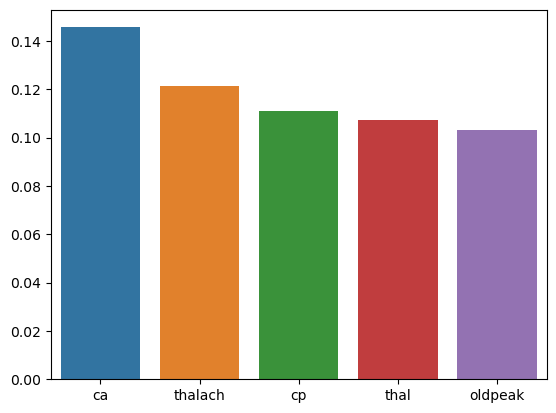

In [31]:
sns.barplot(x=lst1,y=lst2)

### Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [32]:
## Hypeparameter Tuning
params={'max_depth':[3,5,10,None],
              'n_estimators':[100,200,300],
               'criterion':['gini','entropy'],
                'min_samples_split':[2,3,5,6],
                    'min_samples_leaf':[1,2,4,5]
              }

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
classifier=GridSearchCV(classifier,param_grid=params,scoring='accuracy',cv=5,verbose=3)


In [35]:
classifier.fit(X_train, y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.714 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.907 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.9s
[CV 3

[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.738 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.905 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.738 total time=   0.9s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.929 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=2, min_sam

[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.786 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.738 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.905 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.762 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.884 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=4, min_sam

[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.860 total time=   0.7s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.738 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.929 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=200;, score=0.786 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.884 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.860 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.738 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.905 total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.762 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.860 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.860 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.714 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.881 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=300;, score=0.762 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=1, min_sam

[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.884 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.837 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.738 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.905 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=300;, score=0.762 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.837 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=2, min_sam

[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.714 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.905 total time=   1.2s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=300;, score=0.762 total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.837 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=4, min_sam

[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=300;, score=0.738 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.907 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.738 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.905 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=5, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.860 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.857 total time=   0.4s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.860 total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.786 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=1,

[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.881 total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.884 total time=   1.0s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.860 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.714 total time=   1.0s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.881 total time=   1.0s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.762 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=2,

[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=0.837 total time=   0.9s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=0.714 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=0.905 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200;, score=0.738 total time=   1.0s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=300;, score=0.884 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=300;, score=0.860 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=4,

[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=200;, score=0.714 total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=200;, score=0.905 total time=   0.7s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=200;, score=0.762 total time=   0.8s
[CV 1/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=300;, score=0.860 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=300;, score=0.837 total time=   1.4s
[CV 3/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=300;, score=0.738 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=300;, score=0.905 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=10, min_samples_leaf=5,

[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.857 total time=   0.9s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=200;, score=0.762 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.884 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.860 total time=   1.5s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.738 total time=   1.4s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.833 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.762 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=None, min

[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=200;, score=0.738 total time=   0.9s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.860 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.837 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.714 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.905 total time=   1.5s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.762 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=None, min

[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=300;, score=0.884 total time=   1.3s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=300;, score=0.860 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=300;, score=0.714 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=300;, score=0.905 total time=   1.4s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=3, n_estimators=300;, score=0.762 total time=   1.4s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.907 total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=gini, max_depth=None, min

[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=3, n_estimators=300;, score=0.860 total time=   1.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=3, n_estimators=300;, score=0.690 total time=   1.3s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=3, n_estimators=300;, score=0.905 total time=   1.3s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=3, n_estimators=300;, score=0.762 total time=   1.3s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=None, min

[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.762 total time=   1.3s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.905 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=3, n_estimators=300;, score=0.762 total time=   1.3s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.4s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=3, min

[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.905 total time=   1.3s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=3, n_estimators=300;, score=0.762 total time=   1.5s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=3, min

[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=3, n_estimators=300;, score=0.762 total time=   1.2s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=3, min

[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.884 total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.907 total time=   1.0s
[CV 2/5] END criterion=entropy, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=3, min

[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.837 total time=   0.4s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.5s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.833 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.690 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=5, min

[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.690 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=5, min

[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.929 total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.714 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=5, min

[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.714 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.762 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.884 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth=5, min

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.690 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.786 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.884 total time=   1.2s
[CV 2/5] END criterion=entropy, max_depth

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.786 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.837 total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.690 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.881 total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.762 total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300;, score=0.884 total time=   1.3s
[CV 2/5] END criterion=entropy, max_depth

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.837 total time=   1.0s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.929 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.9s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=300;, score=0.884 total time=   1.2s
[CV 2/5] END criterion=entropy, max_depth

[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.714 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.9s
[CV 5/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.738 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=300;, score=0.884 total time=   1.4s
[CV 2/5] END criterion=entropy, max_depth

[CV 5/5] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.7s
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.690 total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.905 total time=   0.7s
[CV 5/5] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.762 total time=   0.8s
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=300;, score=0.884 total time=   1.3s
[CV 2/5] END criterion=entr

[CV 4/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.714 total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.881 total time=   1.0s
[CV 5/5] END criterion=entropy, max_depth=None, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.738 total time=   1.3s
[CV 1/5] END criterion=entr

[CV 3/5] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.690 total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.881 total time=   0.4s
[CV 5/5] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.762 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.860 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.714 total time=   0.7s
[CV 4/5] END criterion=entropy, max_depth=None, min_samples_leaf=4, min_samples_split=5, n_estimators=200;, score=0.881 total time=   0.6s
[CV 5/5] END criterion=entr

[CV 2/5] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.860 total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.714 total time=   0.4s
[CV 4/5] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.905 total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=100;, score=0.738 total time=   0.4s
[CV 1/5] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.884 total time=   0.7s
[CV 2/5] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=None, min_samples_leaf=5, min_samples_split=5, n_estimators=200;, score=0.762 total time=   0.8s
[CV 4/5] END criterion=entr

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [36]:
GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [37]:
y_pred=classifier.predict(X_test)

### Q7. Report the best set of hyperparameters found by the search and the corresponding performance metrics. Compare the performance of the tuned model with the default model.

In [38]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score*100)
print(classification_report(y_pred,y_test))

82.41758241758241
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        39
           1       0.86      0.83      0.84        52

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



Therefore we can see increase in accuracy from 82% to 84% due to hyper parameter tunning using grid search cv


### Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the decision boundaries on a scatter plot of two of the most important features. Discuss the insights and limitations of the model for predicting heart disease risk.

In [40]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.4 MB 281.8 kB/s eta 0:00:05
   ---- ----------------------------------- 0.2/1.4 MB 893.0 kB/s eta 0:00:02
   ----------- ---------------------------- 0.4/1.4 MB 1.8 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 2.9 MB/s eta 0:00:01
   ------------------------------ --------- 1.1/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [41]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [42]:
clf=RandomForestClassifier()

In [43]:
clf.fit(X,y)

RandomForestClassifier()

In [44]:
X=df[['ca','thalach']]

In [45]:
X= X.to_numpy()
y=y.to_numpy()